## Imports

In [1]:

import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import cv2

from numpy import genfromtxt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import *
import graphviz 
from mpl_toolkits.mplot3d import Axes3D

#----------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



num_pixels = 16
%matplotlib inline

In [2]:
# Importing training  data from CSV files
x_train = genfromtxt('x_train_gr_smpl.csv', delimiter=',', skip_header =1)
y_train = genfromtxt('y_train_smpl.csv', delimiter=',', skip_header =1 )

In [3]:
# Importing testing data from CSV files
x_test = genfromtxt('x_test_gr_smpl.csv', delimiter=',', skip_header =1)
y_test = genfromtxt('y_test_smpl.csv', delimiter=',', skip_header =1 )


In [4]:
count = 0
for x in y_test:
    if x == 7:
        count +=1
print(count)
print(len(y_test))

60
4170


In [5]:
# Check data has been imported correctly 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12660, 2304)
(12660,)
(4170, 2304)
(4170,)


## Preprocessing

In [6]:
# Combinging data with labels

y_train = y_train.reshape(12660,1)
train_data_combined = np.append(x_train, y_train, axis=1)

y_test = y_test.reshape(4170,1)
test_data_combined = np.append(x_test, y_test, axis=1)


In [7]:
# Randomises row order in a reproducable way 
np.random.seed(0)
np.random.shuffle(train_data_combined)
np.random.shuffle(test_data_combined)

In [8]:
# Split data and lables that have undergone the same randomization process
x_train = train_data_combined[:,:-1]
y_train = train_data_combined[:, [-1]].reshape(12660,)

x_test = test_data_combined[:,:-1]
y_test = test_data_combined[:, [-1]].reshape(4170,)


In [9]:
# Normalisation of pixels
x_train = x_train.astype('float')/255
x_test  = x_test.astype('float')/255

In [10]:
#  Reducing the number of attributes using opencv's reduce functionality as shown in the second python Lecture
#  As seen in python lectures: https://vision.hw.ac.uk/webapps/blackboard/content/listContent.jsp?course_id=_94419_1&content_id=_3391865_1

x_train = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_train).reshape((-1,num_pixels*num_pixels))

x_test  = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_test).reshape((-1,num_pixels*num_pixels))

In [11]:
x_train.shape

(12660, 256)

## Tree Clasifier

In [12]:
#from sklearn.datasets import load_iris

#iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
#tree.plot_tree(clf.fit(x_train, y_train)) 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("first") 

'first.pdf'

In [14]:
y_pred_ga = clf.predict(x_test)

In [15]:
cm = confusion_matrix(y_test,y_pred_ga)

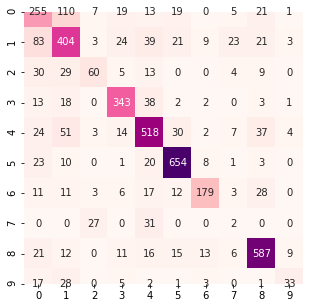

In [16]:

#we transform the confusion matrix to a heatmap
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(cm,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.show()

In [17]:
#classidication report
print(classification_report(y_test,y_pred_ga))

              precision    recall  f1-score   support

         0.0       0.53      0.57      0.55       450
         1.0       0.60      0.64      0.62       630
         2.0       0.58      0.40      0.47       150
         3.0       0.80      0.82      0.81       420
         4.0       0.73      0.75      0.74       690
         5.0       0.87      0.91      0.89       720
         6.0       0.83      0.66      0.74       270
         7.0       0.04      0.03      0.04        60
         8.0       0.83      0.85      0.84       690
         9.0       0.65      0.37      0.47        90

    accuracy                           0.73      4170
   macro avg       0.65      0.60      0.62      4170
weighted avg       0.73      0.73      0.72      4170



## Ten Fold Cross Validation


In [18]:
#create model and run 10 fold cross validation
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, x_train, y_train, cv=10, scoring="f1_macro")
print(scores) #score is an array of f1 scores 
print("Average F score:", scores.mean())

[0.89516068 0.88637007 0.87542116 0.86573923 0.87547352 0.89345161
 0.86801407 0.86403479 0.85584953 0.89672009]
Average F score: 0.877623475883623


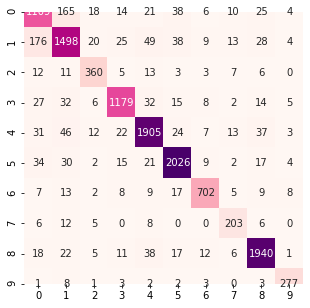

In [19]:
y_pred = cross_val_predict(clf, x_train, y_train, cv=10)
conf_mat = confusion_matrix(y_train, y_pred)
#confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(conf_mat,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.show()

In [20]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78      1410
         1.0       0.82      0.81      0.81      1860
         2.0       0.84      0.86      0.85       420
         3.0       0.92      0.89      0.91      1320
         4.0       0.91      0.91      0.91      2100
         5.0       0.93      0.94      0.93      2160
         6.0       0.92      0.90      0.91       780
         7.0       0.78      0.85      0.81       240
         8.0       0.93      0.94      0.93      2070
         9.0       0.91      0.92      0.91       300

    accuracy                           0.88     12660
   macro avg       0.87      0.88      0.88     12660
weighted avg       0.88      0.88      0.88     12660



In [21]:
#try manuel 10 fold
clf = tree.DecisionTreeClassifier()
kf = KFold(n_splits=10)
cr = []

for train_index, test_index in kf.split(y_train):
    x_train10, x_test10 = x_train[train_index], x_train[test_index]
    y_train10, y_test10 = y_train[train_index], y_train[test_index] 
    clf.fit(x_train10, y_train10)
    #print(confusion_matrix(y_test, clf.predict(x_test)))
    cr.append(classification_report(y_test,clf.predict(x_test), output_dict=True))
#print(cr[-1])

In [22]:
#calculate results from 10 fold cross validation
f1mean = 0
recall = 0
precision = 0
for x in cr:
    dictionary = x['macro avg']
    f1mean += dictionary['f1-score']
    recall += dictionary['recall']
    precision += dictionary['precision']
f1mean = f1mean / 10
recall = recall / 10
precision = precision / 10
print("mean f1:",f1mean)
print("mean recall:",recall)
print("mean precision:",precision)

mean f1: 0.6573534661465172
mean recall: 0.6420471474580172
mean precision: 0.6861804054265879


## Test overfitting

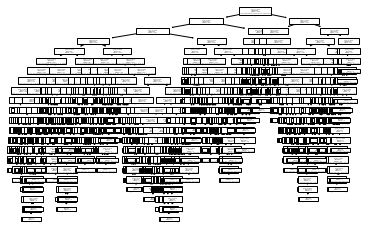

In [41]:
clf = tree.DecisionTreeClassifier()
#clf.fit(x_train, y_train)
tree.plot_tree(clf.fit(x_train, y_train)) 
dot_data = tree.export_graphviz(clf, out_file=None) 

#graph.render("first") 

In [42]:
graph = graphviz.Source(dot_data) 
graph.render("overfitting_tree") 
y_pred_test_data = clf.predict(x_test)
y_pred_train_data = clf.predict(x_train)
print(classification_report(y_test, y_pred_test_data))

              precision    recall  f1-score   support

         0.0       0.54      0.57      0.55       450
         1.0       0.56      0.61      0.59       630
         2.0       0.50      0.37      0.43       150
         3.0       0.81      0.85      0.83       420
         4.0       0.75      0.74      0.74       690
         5.0       0.87      0.90      0.88       720
         6.0       0.81      0.71      0.76       270
         7.0       0.07      0.05      0.06        60
         8.0       0.85      0.86      0.86       690
         9.0       0.68      0.33      0.45        90

    accuracy                           0.73      4170
   macro avg       0.64      0.60      0.62      4170
weighted avg       0.73      0.73      0.72      4170



In [43]:
print(classification_report(y_train, y_pred_train_data))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1410
         1.0       1.00      1.00      1.00      1860
         2.0       1.00      1.00      1.00       420
         3.0       1.00      1.00      1.00      1320
         4.0       1.00      1.00      1.00      2100
         5.0       1.00      1.00      1.00      2160
         6.0       1.00      1.00      1.00       780
         7.0       1.00      1.00      1.00       240
         8.0       1.00      1.00      1.00      2070
         9.0       1.00      1.00      1.00       300

    accuracy                           1.00     12660
   macro avg       1.00      1.00      1.00     12660
weighted avg       1.00      1.00      1.00     12660



Now limmit fitting

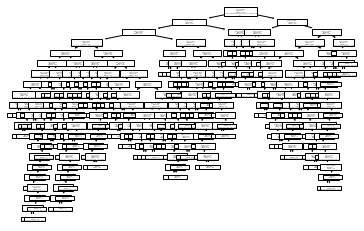

In [44]:
clf_smpl_splt = tree.DecisionTreeClassifier(min_samples_split = 0.01)
tree.plot_tree(clf_smpl_splt.fit(x_train, y_train)) 
dot_data = tree.export_graphviz(clf_smpl_splt, out_file=None) 

 

In [45]:
y_pred_test_data_splt = clf_smpl_splt.predict(x_test)
y_pred_train_data_splt = clf_smpl_splt.predict(x_train)

print(classification_report(y_test, y_pred_test_data_splt))

              precision    recall  f1-score   support

         0.0       0.55      0.51      0.53       450
         1.0       0.54      0.63      0.58       630
         2.0       0.45      0.34      0.39       150
         3.0       0.74      0.85      0.79       420
         4.0       0.77      0.74      0.75       690
         5.0       0.89      0.91      0.90       720
         6.0       0.64      0.55      0.59       270
         7.0       0.06      0.05      0.06        60
         8.0       0.87      0.84      0.85       690
         9.0       0.58      0.41      0.48        90

    accuracy                           0.71      4170
   macro avg       0.61      0.58      0.59      4170
weighted avg       0.71      0.71      0.71      4170



In [46]:
print(classification_report(y_train, y_pred_train_data_splt))

              precision    recall  f1-score   support

         0.0       0.74      0.71      0.72      1410
         1.0       0.71      0.77      0.74      1860
         2.0       0.76      0.81      0.78       420
         3.0       0.81      0.89      0.85      1320
         4.0       0.90      0.87      0.88      2100
         5.0       0.94      0.90      0.92      2160
         6.0       0.84      0.87      0.86       780
         7.0       0.64      0.62      0.63       240
         8.0       0.94      0.92      0.93      2070
         9.0       0.82      0.70      0.75       300

    accuracy                           0.84     12660
   macro avg       0.81      0.80      0.81     12660
weighted avg       0.84      0.84      0.84     12660



In [ ]:
clf_smpl_leaf = tree.DecisionTreeClassifier(min_samples_leaf = 0.0005)
tree.plot_tree(clf_smpl_leaf.fit(x_train, y_train)) 
dot_data = tree.export_graphviz(clf_smpl_leaf, out_file=None)

In [ ]:
y_pred_test_data_leaf = clf_smpl_leaf.predict(x_test)
y_pred_train_data_leaf = clf_smpl_leaf.predict(x_train)

print(classification_report(y_test, y_pred_test_data_leaf))

In [ ]:
print(classification_report(y_train, y_pred_train_data_leaf))